<a href="https://colab.research.google.com/github/yeneua/HG-MLDL/blob/main/9_2_%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9C%BC%EB%A1%9C_IMDB_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb

In [ ]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500) # 가장 자주 등장하는 단어 500개

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, test_input.shape) # 파이썬 리스트의 배열(넘파이 배열에 파이썬 리스트가 들어가 있음)

(20000,) (25000,)


In [ ]:
print(len(train_input[0]), len(train_input[1])) # 리뷰(샘플)마다 길이가 다르다

218 189


In [ ]:
print(train_input[0]) # 첫번째 리뷰에 담긴 내용

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
print(train_target[:20]) # 타깃데이터 20개(긍정&부정) -> 이진분류

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

In [ ]:
import numpy as np
lengths = np.array([len(x) for x in train_input]) # train_input에 들어있는 데이터의 길이(각 리뷰 길이)

In [ ]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


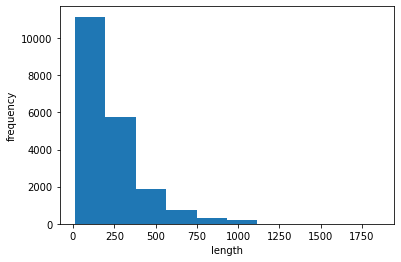

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

# => 중간값이 평균값보다 작고, 한쪽으로 치우침

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences # pad_sequences : 시퀀스 데이터의 길이를 맞춰줌 -> 길이가 긴 경우 잘라내고, 짧은 경우 0으로 패딩(채움)
train_seq = pad_sequences(train_input, maxlen = 100) # maxlen = 100 : 길이를 100으로 맞춤

In [ ]:
print(train_seq.shape)

(20000, 100)


In [ ]:
print(train_seq[0])

# => 앞뒤에 패딩값(0)이 없는 것으로 보아 100보다는 길이가 긴 샘플이었을듯
# truncating = 'pre' : by default

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [ ]:
print(train_input[0][-10:]) # 원데이터(train_input)에 있는 마지막 토큰 10개 출력

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [ ]:
print(train_seq[5])

# => 앞부분에 패딩값(0) 있음, padding = 'pre' : by default

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
val_seq = pad_sequences(val_input, maxlen = 100) # 검증 세트의 길이도 100으로 맞추기

In [ ]:
# 순환신경망 만들기

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
# 원-핫인코딩
train_oh = keras.utils.to_categorical(train_seq)

In [ ]:
print(train_oh.shape)

(20000, 100, 500)


In [ ]:
print(train_oh[0][0][:12]) # 첫번째 토큰 10이 잘 인코딩 되었는지 확인. 처음 원소 12개 출력

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
print(np.sum(train_oh[0][0])) # 모든 값 다 더하기 -> 하나만 1인지 확인(one-hot encoding)

1.0


In [ ]:
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 순환신경망 훈련하기

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_oh, train_target, epochs = 100, batch_size = 64, validation_data = (val_oh, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 47ms/step - loss: 0.6951 - accuracy: 0.5034 - val_loss: 0.6953 - val_accuracy: 0.4992
Epoch 2/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6928 - accuracy: 0.5112 - val_loss: 0.6940 - val_accuracy: 0.5054
Epoch 3/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6914 - accuracy: 0.5221 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6901 - accuracy: 0.5325 - val_loss: 0.6923 - val_accuracy: 0.5170
Epoch 5/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6887 - accuracy: 0.5394 - val_loss: 0.6916 - val_accuracy: 0.5164
Epoch 6/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6872 - accuracy: 0.5437 - val_loss: 0.6907 - val_accuracy: 0.5184
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6857 - accuracy: 0.5498 - val_loss: 0.6898 - val_ac

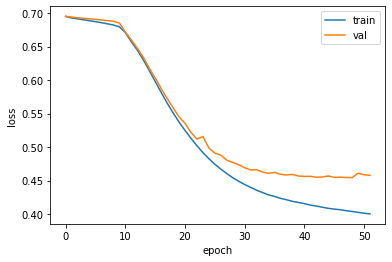

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
print(train_seq.nbytes, train_oh.nbytes) # 원-핫인코딩의 단점: 입력 데이터가 엄청 커짐

8000000 4000000000


In [ ]:
# 단어 임베딩 사용하기

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100)) # 500 : 어휘사전 개수, 16: 출력차원, input_length=100: 입력토큰(타임스텝)의 개수
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 25ms/step - loss: 0.6797 - accuracy: 0.5620 - val_loss: 0.6498 - val_accuracy: 0.6432
Epoch 2/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6280 - accuracy: 0.6769 - val_loss: 0.6141 - val_accuracy: 0.6966
Epoch 3/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5958 - accuracy: 0.7182 - val_loss: 0.5871 - val_accuracy: 0.7204
Epoch 4/100
313/313 [==============================] - 10s 33ms/step - loss: 0.5702 - accuracy: 0.7412 - val_loss: 0.5670 - val_accuracy: 0.7458
Epoch 5/100
313/313 [==============================] - 7s 24ms/step - loss: 0.5482 - accuracy: 0.7587 - val_loss: 0.5513 - val_accuracy: 0.7458
Epoch 6/100
313/313 [==============================] - 7s 24ms/step - loss: 0.5303 - accuracy: 0.7670 - val_loss: 0.5337 - val_accuracy: 0.7564
Epoch 7/100
313/313 [==============================] - 7s 24ms/step - loss: 0.5139 - accuracy: 0.7781 - val_loss: 0.5193 - val_accuracy

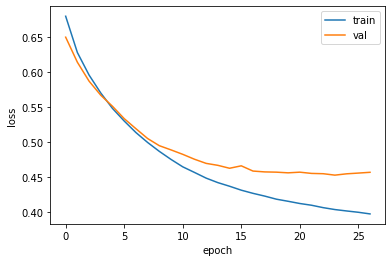

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()